In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import sys
import shutil   
import matplotlib.pyplot as plt
from keras import backend as K
from keras.models import Sequential
from keras import optimizers
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Dense, GlobalAveragePooling2D, Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import History 
from sklearn.metrics import classification_report, confusion_matrix,plot_confusion_matrix,ConfusionMatrixDisplay,accuracy_score
import keras
from keras.layers.convolutional import Conv2D
from keras.layers import Dense
from keras.layers.convolutional import MaxPooling2D
from keras.layers import Flatten
# from keras.layers import LeakyReLU
# from keras.layers.normalization import batch_normalization
keras.layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, 
                                scale=True, beta_initializer='zeros', gamma_initializer='ones',
                                moving_mean_initializer='zeros', moving_variance_initializer='ones', 
                                beta_regularizer=None, gamma_regularizer=None, beta_constraint=None, 
                                gamma_constraint=None)

import warnings
warnings.filterwarnings('ignore')
# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

In [2]:
train = 'c:/Users/jadha/Data/MTP_data_underwater_agumented1/Train'
val = 'c:/Users/jadha/Data/MTP_data_underwater_agumented1/Val'
test = 'c:/Users/jadha/Data/MTP_data_underwater_agumented1/Test'

In [3]:
# Total number of training images
num_of_train_samples = 0
for train_dataset in os.listdir(train):
    in_folder = train + "/" + train_dataset 
    in_folder_list = os.listdir(in_folder)
    num_of_train_samples = num_of_train_samples + len(in_folder_list)
print("Number of Training samples   : ",num_of_train_samples)

# Total number of validation images
num_of_validation_samples = 0
for validation_dataset in os.listdir(val):
    in_folder_val = val + "/" + validation_dataset
    in_folder_val_list = os.listdir(in_folder_val)
    num_of_validation_samples = num_of_validation_samples + len(in_folder_val_list)
print("Number of Validation samples : ", num_of_validation_samples)

# Total number of testing images
num_of_test_samples = 0
for testing_dataset in os.listdir(test):
    in_folder_test = test + "/" + testing_dataset
    in_folder_test_list = os.listdir(in_folder_test)
    num_of_test_samples = num_of_test_samples + len(in_folder_test_list)
print("Number of Test samples : ", num_of_test_samples)

Number of Training samples   :  893
Number of Validation samples :  235
Number of Test samples :  140


In [4]:
for validation_dataset in os.listdir(train):
    print(validation_dataset)

Catla
Mrigal
Rohu
Tilapia
Tuna


In [5]:
train_datagen = ImageDataGenerator(rescale=1. / 255,
                                   rotation_range=40,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

val_datagen = ImageDataGenerator(rescale=1. / 255)

test_datagen=ImageDataGenerator(rescale=1./255)

In [6]:
batch_size = 64
learning_rate = 0.001
epoch = 20

# Defining image width and height respectively
img_rows = 256
img_cols = 256

In [7]:
train_generator = train_datagen.flow_from_directory(train,
                                                    target_size = (img_rows, img_cols),
                                                    batch_size = batch_size,
                                                    class_mode = 'categorical')

validation_generator = val_datagen.flow_from_directory(val,
                                                        target_size = (img_rows, img_cols),
                                                        batch_size = batch_size,
                                                        shuffle = False, class_mode='categorical')

test_generator = test_datagen.flow_from_directory(test,
                                                        target_size = (img_rows, img_cols),
                                                        batch_size = batch_size,
                                                        shuffle = False, class_mode='categorical')

Found 893 images belonging to 5 classes.
Found 235 images belonging to 5 classes.
Found 140 images belonging to 5 classes.


In [8]:
px=train_generator[4][0][7]
px

array([[[0.7800679 , 0.5480468 , 0.37549782],
        [0.77662104, 0.53770626, 0.3651572 ],
        [0.78306353, 0.5438478 , 0.36800236],
        ...,
        [0.13711827, 0.1331967 , 0.11751042],
        [0.12837975, 0.12445819, 0.10877191],
        [0.13133915, 0.12741758, 0.11026908]],

       [[0.7741046 , 0.54587585, 0.3748987 ],
        [0.77851725, 0.5433947 , 0.37084568],
        [0.7792712 , 0.5400555 , 0.36610618],
        ...,
        [0.12581506, 0.12189349, 0.106126  ],
        [0.13455357, 0.130632  , 0.11267988],
        [0.14170538, 0.13778381, 0.11817596]],

       [[0.7665199 , 0.54208356, 0.37300256],
        [0.7803074 , 0.54897726, 0.37644944],
        [0.7769665 , 0.5387426 , 0.36619356],
        ...,
        [0.13776799, 0.13384642, 0.11509069],
        [0.14250897, 0.1385874 , 0.11897957],
        [0.1446936 , 0.14077203, 0.1211642 ]],

       ...,

       [[0.42001233, 0.45530644, 0.45138487],
        [0.42219692, 0.45749104, 0.45356947],
        [0.42438155, 0

In [9]:
steps_per_epoch_vgg16 = num_of_train_samples // batch_size
print("Steps per epoch: ",steps_per_epoch_vgg16)

Steps per epoch:  13


In [10]:

from keras.applications import vgg16
    # The sequential API allows you to create models layer-by-layer
vgg_model=Sequential()
vgg_model.add(vgg16.VGG16(include_top = False, pooling = 'max', weights = 'imagenet'))
vgg_model.add(Dense(5, activation="softmax"))

    # Summary: to find the number of parameters
vgg_model.layers[0].trainable=False
vgg_model.summary() 

adam = optimizers.Adam(lr=learning_rate, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.00001)
vgg_model.compile(loss="categorical_crossentropy",
                  optimizer=adam,
                  metrics=["accuracy"])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 512)               14714688  
                                                                 
 dense (Dense)               (None, 5)                 2565      
                                                                 
Total params: 14,717,253
Trainable params: 2,565
Non-trainable params: 14,714,688
_________________________________________________________________


In [11]:
# from keras.callbacks import LearningRateScheduler

# # Define a learning rate schedule function
# def lr_schedule(epoch):
#     if epoch < 10:
#         return 0.001
#     elif epoch < 30:
#         return 0.0001
#     else:
#         return 0.00001

# # Create a LearningRateScheduler callback using the lr_schedule function
# lr_schedule_callback = LearningRateScheduler(lr_schedule)

In [30]:
# Trains the model for a given number of epochs (iterations on a dataset).
vgg_training = vgg_model.fit_generator(train_generator,
                                       steps_per_epoch = steps_per_epoch_vgg16,
                                       epochs = epoch,
                                       validation_data = validation_generator,
                                       validation_steps = num_of_validation_samples // batch_size)

Epoch 1/20
13/13 [==============================] - 116s 9s/step - loss: 0.8683 - accuracy: 0.6767 - val_loss: 0.9648 - val_accuracy: 0.5677
Epoch 2/20
13/13 [==============================] - 125s 10s/step - loss: 0.8805 - accuracy: 0.6441 - val_loss: 0.9997 - val_accuracy: 0.5625
Epoch 3/20
13/13 [==============================] - 129s 10s/step - loss: 0.8526 - accuracy: 0.6719 - val_loss: 0.9575 - val_accuracy: 0.5938
Epoch 4/20
13/13 [==============================] - 130s 10s/step - loss: 0.8442 - accuracy: 0.6803 - val_loss: 0.9912 - val_accuracy: 0.5625
Epoch 5/20
13/13 [==============================] - 125s 10s/step - loss: 0.8316 - accuracy: 0.6828 - val_loss: 0.9438 - val_accuracy: 0.5990
Epoch 6/20
13/13 [==============================] - 127s 10s/step - loss: 0.8408 - accuracy: 0.6671 - val_loss: 0.9390 - val_accuracy: 0.5990
Epoch 7/20
13/13 [==============================] - 129s 10s/step - loss: 0.8277 - accuracy: 0.6900 - val_loss: 0.9633 - val_accuracy: 0.5833
Epoch 8

In [31]:
vgg_model.evaluate(train_generator)

14/14 [==============================] - 111s 8s/step - loss: 0.7831 - accuracy: 0.7066


[0.7830697894096375, 0.706606924533844]

In [32]:
vgg_model.evaluate(validation_generator)

4/4 [==============================] - 29s 7s/step - loss: 0.8306 - accuracy: 0.6553


[0.830552875995636, 0.6553191542625427]

In [33]:
vgg_model.evaluate(test_generator)

3/3 [==============================] - 17s 5s/step - loss: 0.7444 - accuracy: 0.6429


[0.7444307208061218, 0.6428571343421936]

In [34]:
predictions=vgg_model.predict(test_generator)
predictions

3/3 [==============================] - 17s 5s/step


array([[5.16375661e-01, 1.84139222e-01, 2.04872847e-01, 7.85018727e-02,
        1.61104072e-02],
       [4.76344228e-02, 2.49803644e-02, 4.83134314e-02, 8.65987897e-01,
        1.30838472e-02],
       [3.00873667e-01, 8.73251632e-02, 3.82241130e-01, 2.23575607e-01,
        5.98447118e-03],
       [1.78006113e-01, 3.90634872e-02, 2.66201317e-01, 5.10833323e-01,
        5.89575339e-03],
       [3.14668208e-01, 7.56698847e-02, 3.35600436e-01, 2.68786490e-01,
        5.27499430e-03],
       [3.29811096e-01, 6.17112368e-02, 2.79281527e-01, 3.23206544e-01,
        5.98956645e-03],
       [7.34211206e-01, 7.45262159e-03, 1.93092730e-02, 2.32408419e-01,
        6.61848625e-03],
       [7.59964228e-01, 2.55425484e-03, 3.31917293e-02, 1.43192530e-01,
        6.10973462e-02],
       [8.75762820e-01, 1.19517499e-03, 1.01420758e-02, 1.07204169e-01,
        5.69585012e-03],
       [1.82503045e-01, 6.17157407e-02, 3.07446122e-01, 4.35624063e-01,
        1.27110220e-02],
       [9.56222057e-01, 1.9811

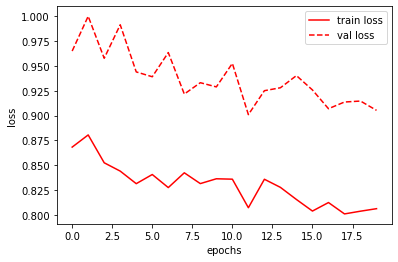

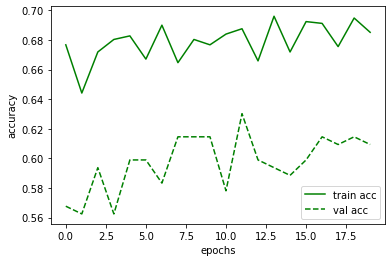

<Figure size 432x288 with 0 Axes>

In [35]:
import matplotlib.pyplot as plt
plt.plot(vgg_training.history['loss'], label='train loss',color='r')
plt.plot(vgg_training.history['val_loss'], label='val loss',color='r',linestyle='--',)
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(vgg_training.history['accuracy'], label='train acc',color='g')
plt.plot(vgg_training.history['val_accuracy'], label='val acc',color='g',linestyle='--')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()
plt.savefig('AccVal_acc')

In [36]:
training_accuracy_vgg      = vgg_training.history['accuracy'][-1]
training_loss_vgg          = vgg_training.history['loss'][-1]
validation_accuracy_vgg    = vgg_training.history['val_accuracy'][-1]
validation_loss_vgg        = vgg_training.history['val_loss'][-1]
print("Training Accuracy VGG    :", training_accuracy_vgg )
print("Training Loss VGG        :", training_loss_vgg)
print("Validation Accuracy VGG  :", validation_accuracy_vgg)
print("Validation Loss VGG      :", validation_loss_vgg)

Training Accuracy VGG    : 0.6851628422737122
Training Loss VGG        : 0.8064867258071899
Validation Accuracy VGG  : 0.609375
Validation Loss VGG      : 0.9052435755729675


In [37]:
# Generating Confusion Matrix and Classification Report
Y_pred_vgg = vgg_model.predict_generator(test_generator, num_of_validation_samples // batch_size+1)
y_pred_vgg = np.argmax(Y_pred_vgg, axis=1)
print('Confusion Matrix')
conf_matrix_vgg = confusion_matrix(test_generator.classes, y_pred_vgg)
cm_vgg = np.array2string(conf_matrix_vgg)
print(conf_matrix_vgg)
print("=============================================================================================")
print('Classification Report')
target_names = ['Catla','Mrigal','Rohu','Tilapia','Tuna']
class_rep_vgg = classification_report(test_generator.classes, y_pred_vgg, target_names=target_names)
print(class_rep_vgg)

Confusion Matrix
[[22  0 12 10  0]
 [ 5  1  4  2  0]
 [ 8  0 12  8  0]
 [ 0  0  0 48  0]
 [ 0  0  0  1  7]]
Classification Report
              precision    recall  f1-score   support

       Catla       0.63      0.50      0.56        44
      Mrigal       1.00      0.08      0.15        12
        Rohu       0.43      0.43      0.43        28
     Tilapia       0.70      1.00      0.82        48
        Tuna       1.00      0.88      0.93         8

    accuracy                           0.64       140
   macro avg       0.75      0.58      0.58       140
weighted avg       0.66      0.64      0.61       140



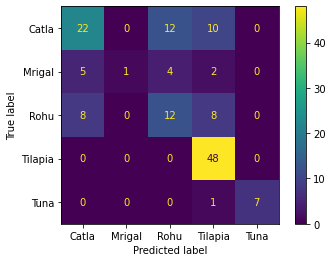

In [38]:
import matplotlib.pyplot as plt
disp=ConfusionMatrixDisplay(conf_matrix_vgg,display_labels=target_names)
disp.plot()
plt.show()